In [2]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid

import copy

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
class QLearning:
    def __init__(self, actions, gamma=0.9, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = gamma
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: np.random.rand(self.actions))
        self.q_values_old = copy.deepcopy(self.q_values)
        
    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]
        
    def update(self, state, action, reward, next_state):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]
        
        ########################## Write Code ####################################
        
        next_q_value = np.max(self.q_values[next_state])
        
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] += self.alpha * td_error
        ###########################################################################
        
    def act(self, state):
        #################### Write epsilion greedy code ###########################
        if np.random.rand() < self.epsilon:
            action = np.random.randint(0, self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        ###########################################################################
        return action

In [4]:
from utils import gen_wrapped_env, show_video

In [5]:
agent_q_learning_1 = QLearning(4, gamma=0.1)
agent_q_learning_5 = QLearning(4, gamma=0.5)
agent_q_learning_9 = QLearning(4, gamma=0.9)
agent_q_learning_99 = QLearning(4, gamma=0.99)

In [6]:
def compute_delta_q(q_values_old, q_values_new):
    total_diff = 0
    for key in q_values_new:
        if key in q_values_old:
            total_diff += np.sum(np.abs(q_values_new[key] - q_values_old[key]))
    return total_diff

In [10]:
def train(agent_q_learning):
    env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
    obs = env.reset()
    agent_position = obs[0]
    rewards = []
    delta_qs = []
    for ep in range(300000):
        done = False
        obs = env.reset()
        action = agent_q_learning.act(obs)
        
        ep_rewards = 0
        while not done:
            next_obs, reward, done, info = env.step(action)
            
            agent_q_learning.update(obs, action, reward, next_obs)
            
            ep_rewards += reward
            obs = next_obs
            action = agent_q_learning.act(obs)
            
        delta_q = compute_delta_q(agent_q_learning.q_values_old, agent_q_learning.q_values)
        delta_qs.append(delta_q)
        agent_q_learning.q_values_old = copy.deepcopy(agent_q_learning.q_values)
        
        rewards.append(ep_rewards)
        if (ep+1) % 1000 == 0:
            print("episode: {}, rewards: {}".format(ep+1, ep_rewards))

    env.close()
    return delta_qs, rewards

In [11]:
delta_qs_1, rewards_1 = train(agent_q_learning_1)
print('done')

delta_qs_5, rewards_5 = train(agent_q_learning_5)
print('done')

delta_qs_9, rewards_9 = train(agent_q_learning_9)
print('done')

delta_qs_99, rewards_99 = train(agent_q_learning_99)
print('done')

episode: 1000, rewards: 0
episode: 2000, rewards: 0.31599999999999995
episode: 3000, rewards: 0
episode: 4000, rewards: 0
episode: 5000, rewards: 0
episode: 6000, rewards: 0
episode: 7000, rewards: 0
episode: 8000, rewards: 0
episode: 9000, rewards: 0
episode: 10000, rewards: 0.838
episode: 11000, rewards: 0
episode: 12000, rewards: 0
episode: 13000, rewards: 0.586
episode: 14000, rewards: 0.42399999999999993
episode: 15000, rewards: 0
episode: 16000, rewards: 0.856
episode: 17000, rewards: 0
episode: 18000, rewards: 0.55
episode: 19000, rewards: 0.15400000000000003
episode: 20000, rewards: 0
episode: 21000, rewards: 0.3879999999999999
episode: 22000, rewards: 0
episode: 23000, rewards: 0
episode: 24000, rewards: 0
episode: 25000, rewards: 0.766
episode: 26000, rewards: 0
episode: 27000, rewards: 0.856
episode: 28000, rewards: 0.6759999999999999
episode: 29000, rewards: 0
episode: 30000, rewards: 0.604
episode: 31000, rewards: 0.856
episode: 32000, rewards: 0.3879999999999999
episode: 

In [16]:
print('gamma: 0.1', {s:np.round(q, 5).tolist() for s, q in agent_q_learning_1.q_values.items()})
print('gamma: 0.5', {s:np.round(q, 5).tolist() for s, q in agent_q_learning_5.q_values.items()})
print('gamma: 0.9', {s:np.round(q, 5).tolist() for s, q in agent_q_learning_9.q_values.items()})
print('gamma: 0.99', {s:np.round(q, 5).tolist() for s, q in agent_q_learning_99.q_values.items()})

gamma: 0.1 {0: [0.0, 0.0, 0.0, 0.0], 12: [0.0, 0.0, 0.0, 0.0], 24: [0.0, 0.0, 0.0, 0.0], 36: [1e-05, 1e-05, 0.00012, 1e-05], 3: [0.0, 0.0, 0.0, 0.0], 15: [0.0, 0.0, 3e-05, 0.0], 27: [0.0001, 0.0001, 0.00106, 0.0001], 18: [3e-05, 3e-05, 0.00035, 3e-05], 39: [0.00236, 0.00243, 0.02884, 0.00247], 30: [0.00129, 0.00127, 0.01541, 0.00127], 33: [0.01235, 0.01183, 0.1123, 0.01238], 6: [0.0, 0.0, 0.0, 0.0], 9: [0.0, 0.0, 0.0, 0.0], 45: [0.55411, 0.9019, 0.23308, 0.83132], 21: [0.00022, 0.00021, 0.00146, 0.00022], 42: [0.04003, 0.03932, 0.4367, 0.0401]}
gamma: 0.5 {0: [0.00011, 0.00011, 0.00026, 0.00011], 3: [0.00014, 0.00014, 0.00033, 0.00014], 6: [0.0003, 0.00029, 0.00067, 0.00028], 12: [0.00066, 0.00065, 0.0016, 0.00066], 24: [0.00182, 0.00184, 0.00372, 0.00183], 36: [0.00413, 0.00416, 0.00687, 0.00417], 9: [0.00069, 0.0007, 0.00151, 0.00069], 18: [0.0094, 0.0095, 0.02065, 0.00936], 30: [0.06634, 0.06634, 0.12883, 0.06746], 15: [0.00428, 0.00427, 0.00961, 0.00432], 27: [0.0269, 0.02686, 0.05

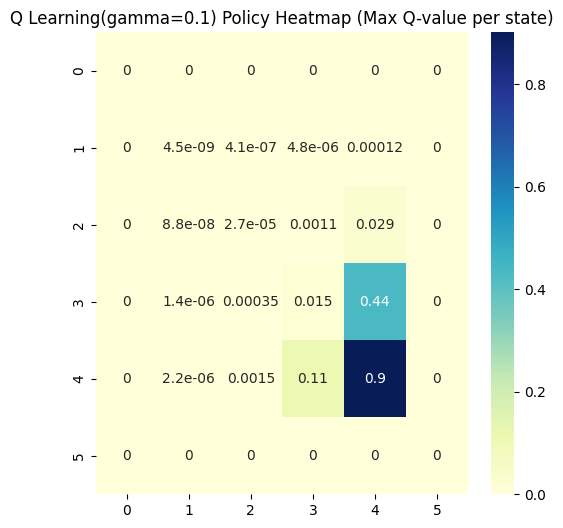

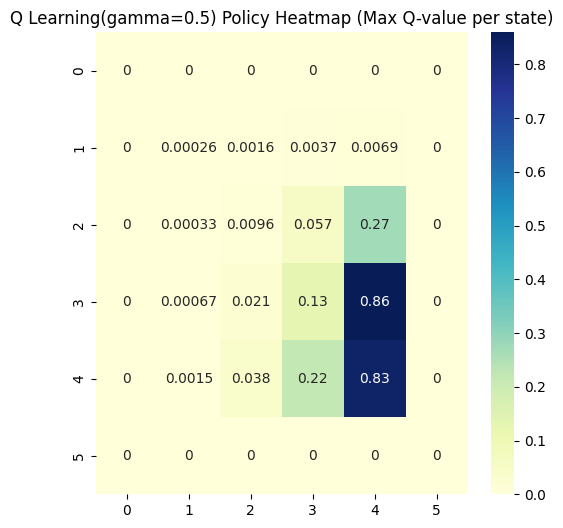

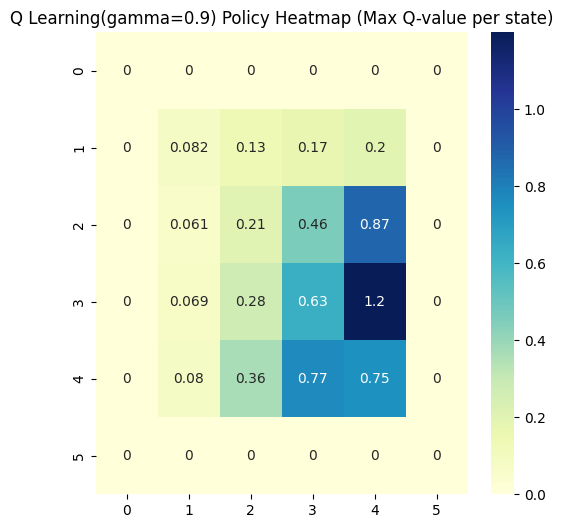

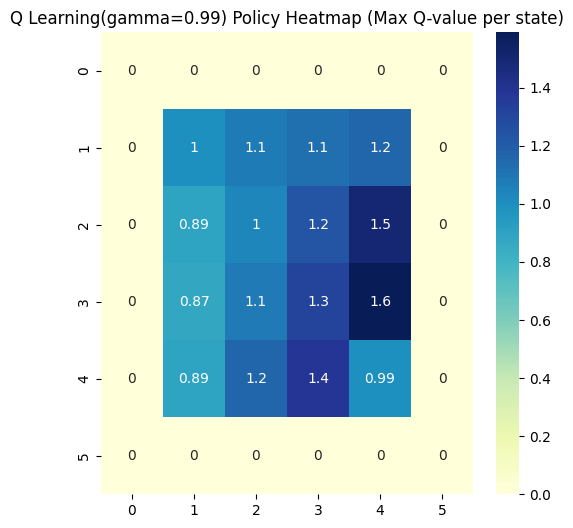

In [49]:
import seaborn as sns

q_map = np.zeros((4, 6, 6))
q_values = [
    agent_q_learning_1.q_values,
    agent_q_learning_5.q_values,
    agent_q_learning_9.q_values,
    agent_q_learning_99.q_values,
]
gamma = [
    0.1, 0.5, 0.9, 0.99
]

for idx in range(4):
    for state in q_values[idx]:
        state_ = state // 3
        x = state_ % 4
        y = state_ // 4
        q_map[idx, y + 1, x + 1] = np.max(q_values[idx][state])
        
    plt.figure(figsize=(6,6))
    sns.heatmap(q_map[idx].T, annot=True, cmap='YlGnBu', cbar=True)
    plt.title(f"Q Learning(gamma={gamma[idx]}) Policy Heatmap (Max Q-value per state)")
    plt.gca()

plt.show()

In [50]:
show_video()

In [25]:
pd.Series(rewards_1).to_csv('./logs/rewards_qlearning_1.csv')
pd.Series(rewards_5).to_csv('./logs/rewards_qlearning_5.csv')
pd.Series(rewards_9).to_csv('./logs/rewards_qlearning_9.csv')
pd.Series(rewards_99).to_csv('./logs/rewards_qlearning_99.csv')

In [26]:
def compute_success_rate_np(rewards):
    rewards = np.array(rewards)
    successes = (rewards > 0).astype(int)
    cumulative_successes = np.cumsum(successes)
    episodes = np.arange(1, len(rewards) + 1)
    return cumulative_successes / episodes

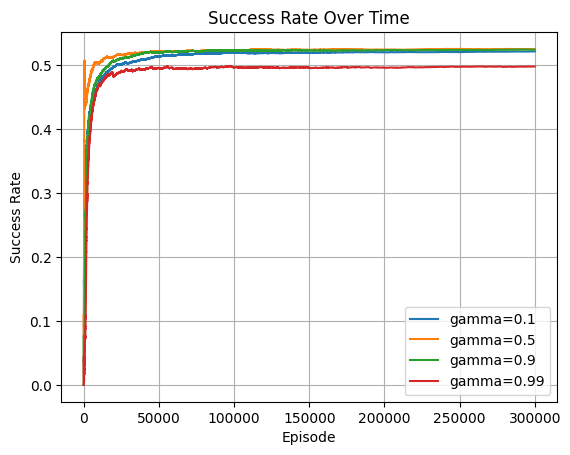

In [28]:
q_success_1 = compute_success_rate_np(rewards_1)
q_success_5 = compute_success_rate_np(rewards_5)
q_success_9 = compute_success_rate_np(rewards_9)
q_success_99 = compute_success_rate_np(rewards_99)

plt.plot(q_success_1, label="gamma=0.1")
plt.plot(q_success_5, label="gamma=0.5")
plt.plot(q_success_9, label="gamma=0.9")
plt.plot(q_success_99, label="gamma=0.99")
plt.xlabel("Episode")
plt.ylabel("Success Rate")
plt.title("Success Rate Over Time")
plt.legend()
plt.grid(True)
plt.show()

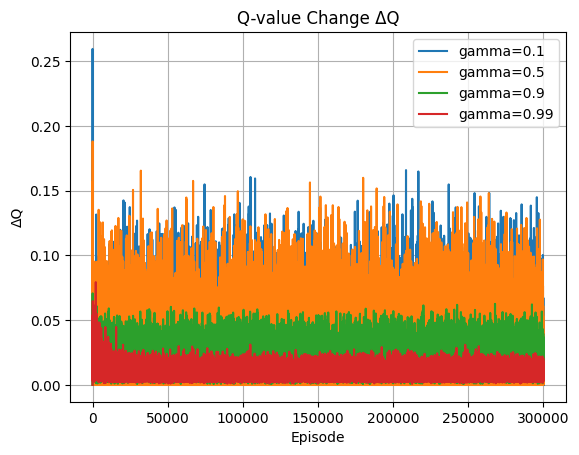

In [32]:
plt.plot(delta_qs_1, label="gamma=0.1")
plt.plot(delta_qs_5, label="gamma=0.5")
plt.plot(delta_qs_9, label="gamma=0.9")
plt.plot(delta_qs_99, label="gamma=0.99")
plt.title("Q-value Change ΔQ")
plt.xlabel("Episode")
plt.ylabel("ΔQ")
plt.legend()
plt.grid(True)
plt.show()

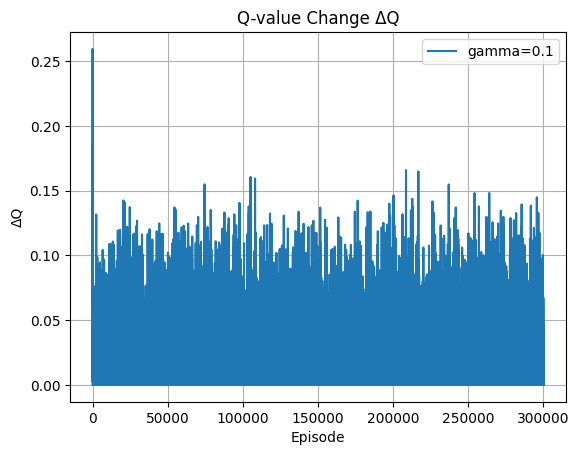

In [33]:
plt.plot(delta_qs_1, label="gamma=0.1")
plt.title("Q-value Change ΔQ")
plt.xlabel("Episode")
plt.ylabel("ΔQ")
plt.legend()
plt.grid(True)
plt.show()

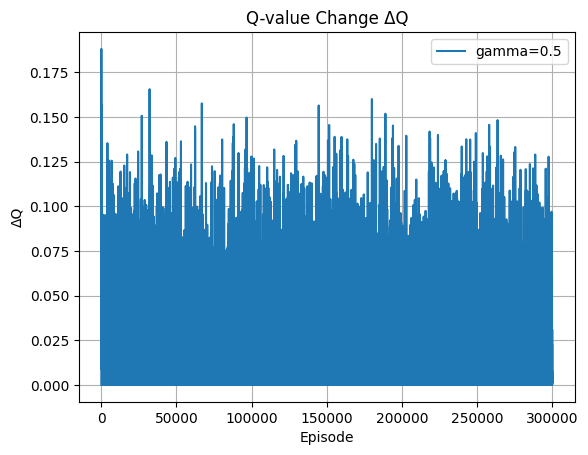

In [34]:
plt.plot(delta_qs_5, label="gamma=0.5")
plt.title("Q-value Change ΔQ")
plt.xlabel("Episode")
plt.ylabel("ΔQ")
plt.legend()
plt.grid(True)
plt.show()

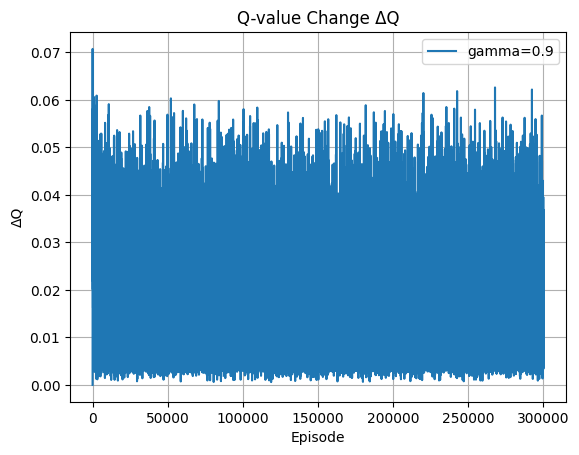

In [35]:
plt.plot(delta_qs_9, label="gamma=0.9")
plt.title("Q-value Change ΔQ")
plt.xlabel("Episode")
plt.ylabel("ΔQ")
plt.legend()
plt.grid(True)
plt.show()

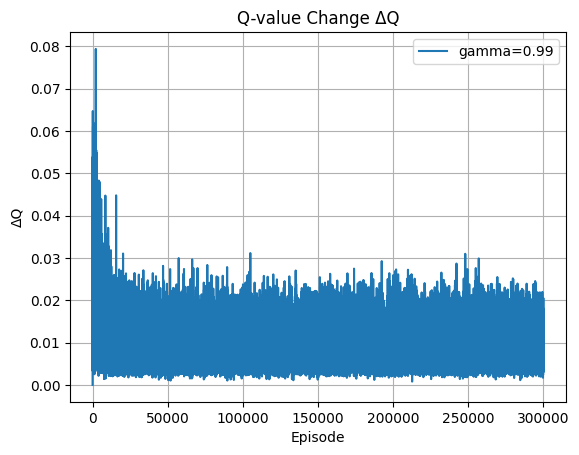

In [37]:
plt.plot(delta_qs_99, label="gamma=0.99")
plt.title("Q-value Change ΔQ")
plt.xlabel("Episode")
plt.ylabel("ΔQ")
plt.legend()
plt.grid(True)
plt.show()

In [54]:
output = {
    'gamma_1': [
        rewards_1,
        agent_q_learning_1,
        delta_qs_1
    ],
    'gamma_5': [
        rewards_5,
        agent_q_learning_5,
        delta_qs_5
    ],
    'gamma_9': [
        rewards_9,
        agent_q_learning_9,
        delta_qs_9
    ],
    'gamma_99': [
        rewards_99,
        agent_q_learning_99,
        delta_qs_99
    ],
    
}

In [55]:
pip install dill

Note: you may need to restart the kernel to use updated packages.


In [56]:
import dill as pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(output, f)